**DATA VISUALIZATION OF BASE MODELS RESULTS**

In [2]:
import pandas as pd
import numpy as np

f1score_stacking_params = pd.read_csv("weighted_f1_stacking_params.csv", sep='\,', engine='python')
f1score_stacking = pd.read_csv("weighted_f1_stacking.csv", sep='\,', engine='python')
f1score_blending_params = pd.read_csv("weighted_f1_blending_params.csv", sep='\,', engine='python')
f1score_blending = pd.read_csv("weighted_f1_blending.csv", sep='\,', engine='python')
f1score_ensembling_params = pd.read_csv("weighted_f1_ensembling_params.csv", sep='\,', engine='python')
f1score_ensembling = pd.read_csv("weighted_f1_ensembling.csv", sep='\,', engine='python')

In [4]:
print(f"Stacking V2 Mean Weighted F1-Score:   {np.mean(f1score_stacking_params['score'])}")
print(f"Stacking V1 Mean Weighted F1-Score:   {np.mean(f1score_stacking['score'])}\n")

print(f"Blending V2 Mean Weighted F1-Score:   {np.mean(f1score_blending_params['score'])}")
print(f"Blending V1 Mean Weighted F1-Score:   {np.mean(f1score_blending['score'])}\n")

print(f"Ensembling V2 Mean Weighted F1-Score: {np.mean(f1score_ensembling_params['score'])}")
print(f"Ensembling V1 Mean Weighted F1-Score: {np.mean(f1score_ensembling['score'])}")

Stacking V2 Mean Weighted F1-Score:   0.668989615492289
Stacking V1 Mean Weighted F1-Score:   0.6674173245254069

Blending V2 Mean Weighted F1-Score:   0.664073294157387
Blending V1 Mean Weighted F1-Score:   0.6620278169535677

Ensembling V2 Mean Weighted F1-Score: 0.6591275901156413
Ensembling V1 Mean Weighted F1-Score: 0.6364774420476367


In [5]:
sorted_ensemble_scores = [f1score_ensembling['score'],
                          f1score_ensembling_params['score'],
                          f1score_blending['score'],
                          f1score_blending_params['score'],
                          f1score_stacking['score'],
                          f1score_stacking_params['score']
                         ]

sorted_ensemble_names = ["Ensembling V1",
                         "Ensembling V2",
                         "Blending V1",
                         "Blending V2",
                         "Stacking V1",
                         "Stacking V2"
                    ]

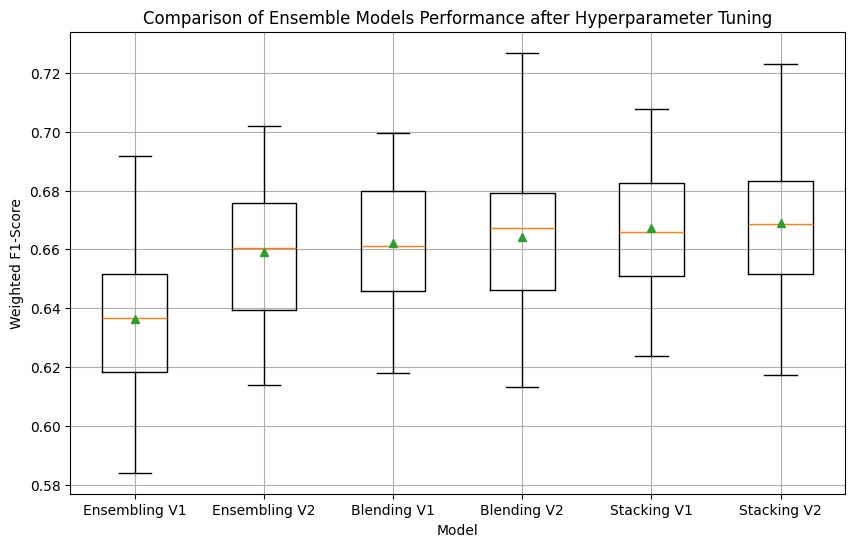

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 6))
plt.boxplot(sorted_ensemble_scores, tick_labels = sorted_ensemble_names, showmeans = True)
plt.title('Comparison of Ensemble Models Performance after Hyperparameter Tuning')
plt.ylabel('Weighted F1-Score')
plt.xlabel('Model')
plt.grid(True)
plt.show()

#fig.savefig('comparisonEnsembleModelsParams.png')

**PLOT ENSEMBLE MODELS WITH TIME**

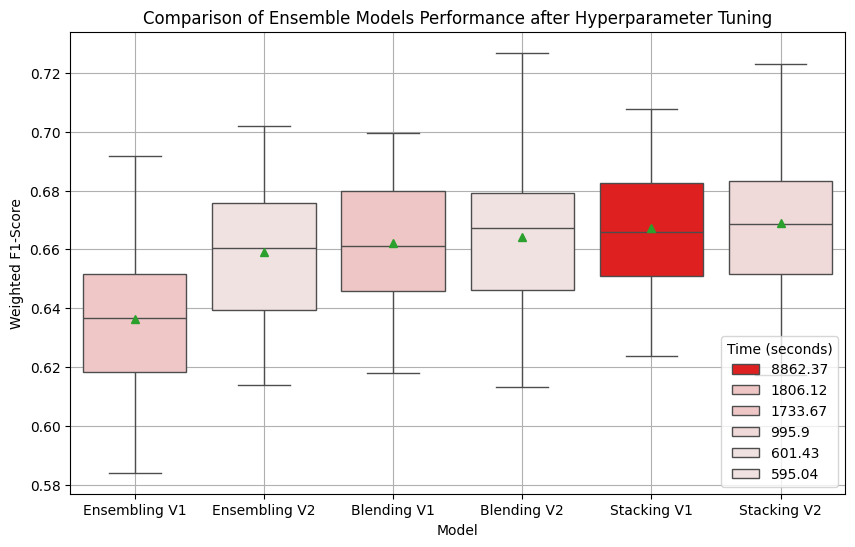

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "Model": np.repeat(sorted_ensemble_names, 102),
    "Score": np.concatenate(sorted_ensemble_scores),
    "Time": np.concatenate([np.repeat(1733.67, 102),
                            np.repeat(595.04, 102),
                            np.repeat(1806.12, 102),
                            np.repeat(601.43, 102),
                            np.repeat(8862.37, 102),
                            np.repeat(995.90, 102),]
                          )
}

df = pd.DataFrame(data)

# Plotting with Seaborn
fig = plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="Model",
    y="Score",
    hue="Time",
    palette="light:#F00",
    hue_norm=(0, df["Time"].max()), # df["Time"].min(), df["Time"].max()
    dodge=False,
    showmeans = True
)

# Add title and labels
plt.title("Comparison of Ensemble Models Performance after Hyperparameter Tuning")
plt.ylabel("Weighted F1-Score")
plt.xlabel("Model")

# Add colorbar
# sm = plt.cm.ScalarMappable(cmap= sns.color_palette("light:#F00", as_cmap=True), norm=plt.Normalize(vmin=0, vmax=df["Time"].max()))
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=plt.gca(), orientation="vertical")
# cbar.set_label("Time (seconds)")

#plt.legend([],[], frameon=False)

plt.legend(reverse = True, title = "Time (seconds)", loc = "lower right")

plt.grid(True)
plt.show()

#fig.savefig('comparisonEnsembleModelsParamsTime.png')

**COMPARISON OF BEST BASE MODEL WITH BEST ENSEMBLE MODEL**

In [10]:
f1score_gb_params = pd.read_csv("weighted_f1_gb_params.csv", sep='\,', engine='python')

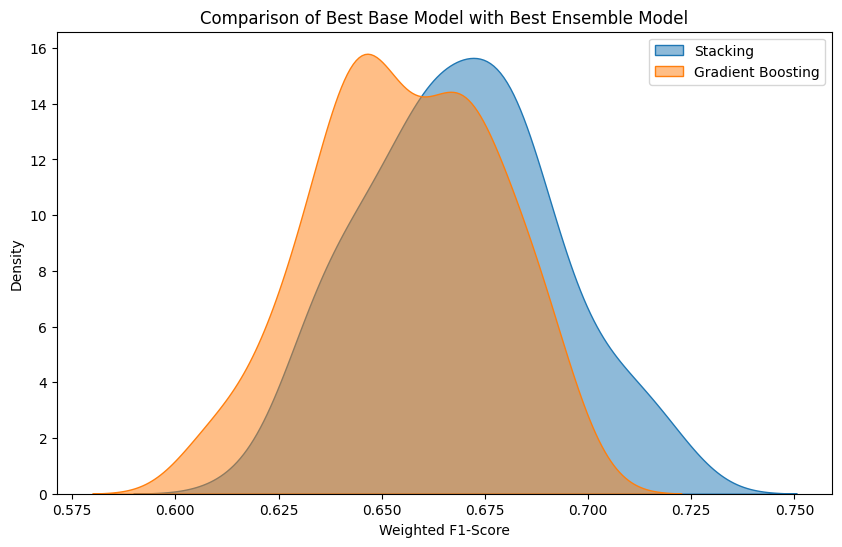

In [17]:
"""
# Calculate min, mean, max, and standard deviation
min_val = f1score_stacking['score'].min()
mean_val = f1score_stacking['score'].mean()
max_val = f1score_stacking['score'].max()
std_val = f1score_stacking['score'].std()
"""

# Create the density plot
fig = plt.figure(figsize=(10, 6))
sns.kdeplot(f1score_stacking_params['score'], fill=True, label = "Stacking", alpha=0.5)
sns.kdeplot(f1score_gb_params['score'], fill=True, label = "Gradient Boosting", alpha=0.5)

"""
# Add vertical lines for min, mean, max, and std
plt.axvline(x=min_val, color='r', linestyle='--', label=f'Min: {min_val:.4f}')
plt.axvline(x=mean_val, color='b', linestyle='--', label=f'Mean: {mean_val:.4f}')
plt.axvline(x=max_val, color='g', linestyle='--', label=f'Max: {max_val:.4f}')
plt.axvline(x=mean_val + std_val, color='orange', linestyle='--', label=f'+1 Std: {mean_val + std_val:.4f}')
plt.axvline(x=mean_val - std_val, color='orange', linestyle='--', label=f'-1 Std: {mean_val - std_val:.4f}')
"""

plt.title('Comparison of Best Base Model with Best Ensemble Model')
plt.xlabel('Weighted F1-Score')
plt.ylabel('Density')
plt.legend()
plt.show()

#fig.savefig('comparisonBestModelsParams.png')

In [13]:
print(f"Stacking Mean Weighted F1-Score:            {np.mean(f1score_stacking_params['score'])}")
print(f"Gradient Boosting Mean Weighted F1-Score:   {np.mean(f1score_gb_params['score'])}")

Stacking Mean Weighted F1-Score:            0.668989615492289
Gradient Boosting Mean Weighted F1-Score:   0.6554794802906446
